## Install MPSlib (if not allready installed)


In [1]:
module_name='mpslib'
try:
    __import__(module_name)
    print('%s allready installed. skipping installation.' % module_name)
    exe_folder = ''
        
except ImportError:
    import sys
    is_colab = 'google.colab' in sys.modules
    print (is_colab)
    if is_colab:
        import os
        os.chdir('/content')
        print('%s cannot be loaded. trying to install it.' % module_name)
        !curl -O https://raw.githubusercontent.com/ergosimulation/mpslib/master/install_latest_mpslib.sh
        !sh ./install_latest_mpslib.sh
        os.chdir('/content')
        exe_folder = '/content/mpslib'
    else:
        print('Pleas install MPSlib and scikit-mps from http://github.com/ergosimulation/mpslib/')
    
import sys
is_colab = 'google.colab' in sys.modules
if is_colab:
    exe_folder = '/content/mpslib'
else:
  exe_folder = ''

print("Using MPSlib installed in %s " % exe_folder)


mpslib allready installed. skipping installation.
Using MPSlib installed in  


In [1]:
import mpslib as mps
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

## Select traning image

Beginning download of http://www.trainingimages.org/uploads/3/4/7/0/34703305/ti_strebelle.sgems to ti_strebelle.dat


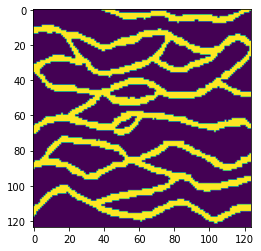

In [2]:

TI, TI_filename = mps.trainingimages.strebelle(di=2, coarse3d=1)
#TI, TI_filename = mps.trainingimages.checkerboard2()
#TI, TI_filename = mps.trainingimages.rot90()
plt.imshow(TI[:,:,0].T)
#mps.trainingimages.ti_plot_all()

## Setup MPSlib

In [5]:
O = mps.mpslib(method='mps_snesim_tree',verbose_level=-1, debug_level=-1)
#O = mps.mpslib(method='mps_genesim')
O.parameter_filename = 'mps.txt'
O.par['n_real']=100
O.par['n_cond']=36
O.par['template_size']=np.array([[10,5],[10,5],[1,1]])
O.par['origin']=np.array([0,0,0])
O.par['simulation_grid_size']=np.array([40,20,1])

# hard data
O.d_hard = np.array([[ 10, 5, 0, 1],
                       [ 30, 15, 0, 0]])

# soft data
O.d_soft = np.array([[ 10, 15, 0, 0.9, 0.1],
                       [ 30, 5, 0, 0.9, 0.1]])

Using MPSlib installed in /mnt/f/PROGRAMMING/mpslib (from /mnt/f/PROGRAMMING/mpslib/scikit-mps/mpslib/mpslib.py)


## Run MPSlib

In [6]:
O.ti = TI
# Serial 
#O.run()
# Parallel
O.run_parallel()

parallel: using 10 threads to simulate 100 realizations
parallel: with up to 10 relizations per thread
parallel: Using 10 of max 10 threads
__name__ = mpslib.mpslib
Thread:000, nr=10Thread:001, nr=10

Thread:002, nr=10Thread:003, nr=10

Thread:004, nr=10Thread:005, nr=10

Thread:006, nr=10Thread:007, nr=10
Thread:008, nr=10
Thread:009, nr=10

parallel job done. Collecting data from threads
parallel: collected 100 realizations


## Plot realizations and E-types

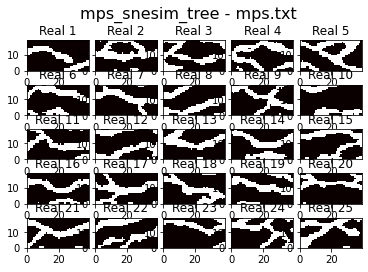

/mnt/f/PROGRAMMING/mpslib/scikit-mps/mpslib/mpslib.py:952: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(self.d_hard[:, 0], self.d_hard[:, 1], "k.", MarkerSize=25, zorder=0)


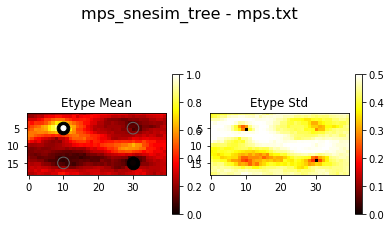

In [7]:
O.plot_reals()
O.plot_etype()

In [12]:
O.par['do_entropy']=1
O.par['do_estimation']=1
O.par['n_real']=1
O.run()


NC=2
E(real#0) = 655.877
H=E(SelfInformation)=655.877


True

In [13]:
O